In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import *

In [4]:
df=pd.read_csv('energy_consumption.csv',index_col=['Datetime'],parse_dates=['Datetime'])
df.head()

,DOM_MW
Datetime,
2005-12-31 01:00:00,9389.0
2005-12-31 02:00:00,9070.0
2005-12-31 03:00:00,9001.0
2005-12-31 04:00:00,9042.0
2005-12-31 05:00:00,9132.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116189 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DOM_MW  116189 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [9]:
train_size=int(len(df)*0.8)
length_df=len(df)

train=df[0:train_size]
test=df[train_size:length_df]


In [10]:
len(train)

92951

In [11]:
len(test)

23238

In [12]:
scaler=MinMaxScaler()

scaled_train=scaler.fit_transform(train)

In [13]:
time_step=50

x_train=[]
y_train=[]

for i in range(time_step,len(scaled_train)):
    x_train.append(scaled_train[i-time_step:i,0])
    y_train.append(scaled_train[i,0])

In [15]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [16]:
x_train.shape

(92901, 50)

In [17]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(92901, 50, 1)

In [20]:
rnn_model=Sequential()

rnn_model.add(SimpleRNN(64,activation='tanh',return_sequences=True,input_shape=(x_train.shape[1],1)))
rnn_model.add(Dropout(0.2))

rnn_model.add(SimpleRNN(64,activation='tanh',return_sequences=True))
rnn_model.add(Dropout(0.20))

rnn_model.add(SimpleRNN(64,activation='tanh',return_sequences=True))
rnn_model.add(Dropout(0.20))

rnn_model.add(SimpleRNN(64,activation='tanh',return_sequences=True))
rnn_model.add(Dropout(0.20))

rnn_model.add(SimpleRNN(64,activation='tanh',return_sequences=True))
rnn_model.add(Dropout(0.20))

rnn_model.add(SimpleRNN(64))
rnn_model.add(Dropout(0.20))

rnn_model.add(Dense(1))

c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
rnn_model.compile(optimizer='adam',loss='mse')
rnn_model.fit(x_train,y_train,epochs=5)

Epoch 1/5
2904/2904 ━━━━━━━━━━━━━━━━━━━━ 66s 21ms/step - loss: 0.0821
Epoch 2/5
2904/2904 ━━━━━━━━━━━━━━━━━━━━ 61s 21ms/step - loss: 0.0030
Epoch 3/5
2904/2904 ━━━━━━━━━━━━━━━━━━━━ 62s 21ms/step - loss: 0.0015
Epoch 4/5
2904/2904 ━━━━━━━━━━━━━━━━━━━━ 63s 22ms/step - loss: 9.7067e-04
Epoch 5/5
2904/2904 ━━━━━━━━━━━━━━━━━━━━ 64s 22ms/step - loss: 8.1854e-04


In [23]:
test_array=test.values

In [24]:
total_data=pd.concat((df['DOM_MW'],test['DOM_MW']),axis=0)

In [25]:
inputs=total_data[len(total_data)-len(test)-time_step:].values.reshape(-1,1)

In [26]:
inputs=scaler.transform(inputs)

c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [27]:
inputs.shape

(23288, 1)

In [28]:
x_test=[]
for i in range(time_step,inputs.shape[0]):
    x_test.append(inputs[i-time_step:i-0])

In [29]:
x_test=np.array(x_test)
x_test.shape

(23238, 50, 1)

In [30]:
ypred=rnn_model.predict(x_test)
ypred

727/727 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step


array([[0.7762438 ],
       [0.62552   ],
       [0.6241694 ],
       ...,
       [0.78990597],
       [0.7884259 ],
       [0.7820822 ]], dtype=float32)

In [31]:
ypred=scaler.inverse_transform(ypred)
ypred

array([[17086.82 ],
       [14012.356],
       [13984.808],
       ...,
       [17365.502],
       [17335.312],
       [17205.912]], dtype=float32)

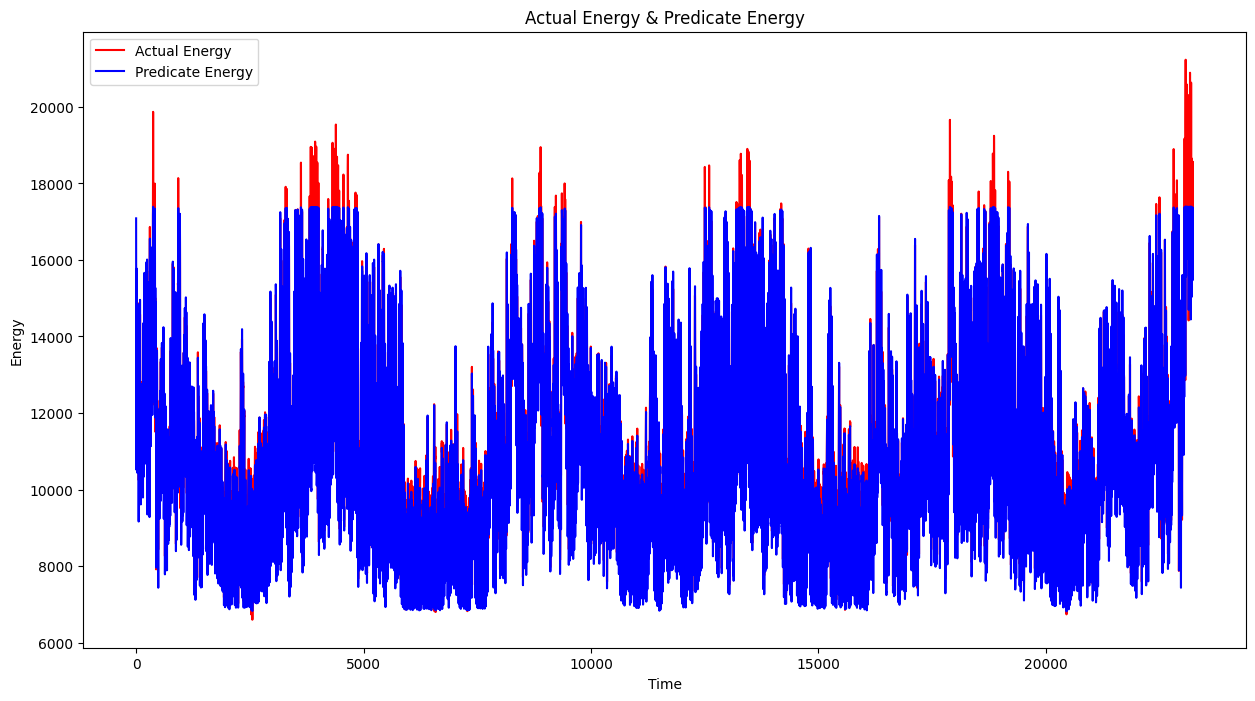

In [33]:
plt.figure(figsize=(15,8))
plt.plot(test_array,color='red',label='Actual Energy')
plt.plot(ypred,color='blue',label='Predicate Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title("Actual Energy & Predicate Energy")
plt.legend()
plt.show()

In [34]:
lstm_model=Sequential()

lstm_model.add(LSTM(64,activation='tanh',return_sequences=True,input_shape=(x_train.shape[1],1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(64,activation='tanh',return_sequences=True))
lstm_model.add(Dropout(0.20))

lstm_model.add(LSTM(64,activation='tanh',return_sequences=True))
lstm_model.add(Dropout(0.20))

lstm_model.add(LSTM(64,activation='tanh',return_sequences=True))
lstm_model.add(Dropout(0.20))

lstm_model.add(LSTM(64,activation='tanh',return_sequences=True))
lstm_model.add(Dropout(0.20))

lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.20))

lstm_model.add(Dense(1))

c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
lstm_model.compile(optimizer='adam',loss='mse')
lstm_model.fit(x_train,y_train,epochs=5)

Epoch 1/5
2904/2904 ━━━━━━━━━━━━━━━━━━━━ 134s 45ms/step - loss: 0.0081
Epoch 2/5
2904/2904 ━━━━━━━━━━━━━━━━━━━━ 126s 43ms/step - loss: 0.0021
Epoch 3/5
2904/2904 ━━━━━━━━━━━━━━━━━━━━ 126s 43ms/step - loss: 7.6831e-04
Epoch 4/5
2904/2904 ━━━━━━━━━━━━━━━━━━━━ 126s 43ms/step - loss: 5.5682e-04
Epoch 5/5
2904/2904 ━━━━━━━━━━━━━━━━━━━━ 126s 43ms/step - loss: 4.9085e-04


In [36]:
y_pred=lstm_model.predict(x_test)

y_pred=scaler.inverse_transform(y_pred)


727/727 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step


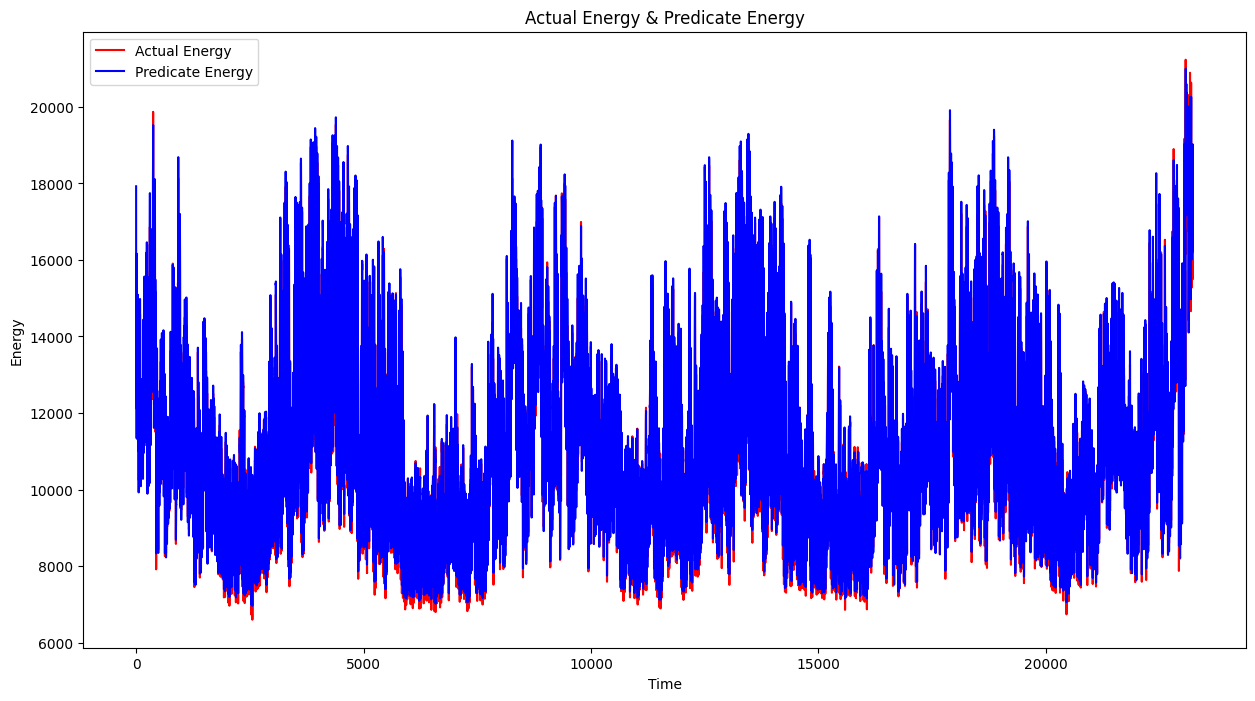

In [37]:
plt.figure(figsize=(15,8))
plt.plot(test_array,color='red',label='Actual Energy')
plt.plot(y_pred,color='blue',label='Predicate Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title("Actual Energy & Predicate Energy")
plt.legend()
plt.show()